In [1]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, GlobalAveragePooling2D


In [2]:
class_names = ['0','1','2','3','4']

In [3]:
datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2
                             )

In [4]:
train_generator = datagen.flow_from_directory(
    directory=r"C:\Users\Manas\Videos\datasets\New folder\train classes",
    classes=class_names,
    target_size=(224, 224),  # Keep this to ensure consistency with model input size
    #color_mode="grayscale",  # Convert images to grayscale
    shuffle=True,
    batch_size = 32,
    class_mode="categorical",
    subset="training"
)

Found 2931 images belonging to 5 classes.


In [5]:
test_generator = datagen.flow_from_directory(
    directory=r"C:\Users\Manas\Videos\datasets\New folder\test_images",
    target_size=(224, 224),  # Keep consistent size for test set as well
   # color_mode="grayscale",  # Convert images to grayscale
    shuffle=False,
    batch_size=32,
    class_mode=None,
)

Found 1445 images belonging to 1 classes.


In [6]:
val_accuracy_generator = datagen.flow_from_directory(
    directory=r"C:\Users\Manas\Videos\datasets\New folder\train classes",
    classes=class_names,
    target_size=(224, 224),
    shuffle = True,
    batch_size= 32,
    class_mode ="categorical",
    subset='validation'
)
# changes in class_mode

Found 731 images belonging to 5 classes.


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(244, 244, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

c:\Users\Manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 242, 242, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 121, 121, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 119, 119, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 59, 59, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 57, 64)     │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3)) ##
model.add(Dense(5, activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 242, 242, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 121, 121, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 119, 119, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 59, 59, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 57, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,501 (416.02 KB)

 Trainable params: 106,501 (416.02 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=val_accuracy_generator)

Epoch 1/10


c:\Users\Manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:567: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
c:\Users\Manas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 446s 5s/step - accuracy: 0.4659 - loss: 1.3746 - val_accuracy: 0.5062 - val_loss: 1.1688
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 486s 5s/step - accuracy: 0.5596 - loss: 1.1050 - val_accuracy: 0.7073 - val_loss: 0.8683
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 478s 5s/step - accuracy: 0.7068 - loss: 0.8716 - val_accuracy: 0.7155 - val_loss: 0.8037
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 447s 5s/step - accuracy: 0.7259 - loss: 0.8222 - val_accuracy: 0.7168 - val_loss: 0.7823
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 497s 5s/step - accuracy: 0.7245 - loss: 0.7956 - val_accuracy: 0.7004 - val_loss: 0.8081
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 492s 5s/step - accuracy: 0.7114 - loss: 0.8321 - val_accuracy: 0.7168 - val_loss: 0.7815
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 453s 5s/step - accuracy: 0.7411 - loss: 0.7534 - val_accuracy: 0.7182 - val_loss: 0.8069
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 444s 5s/step - accuracy: 0.7353 - loss: 0.7720 - val_accuracy: 0.7018 - val_loss: 0.

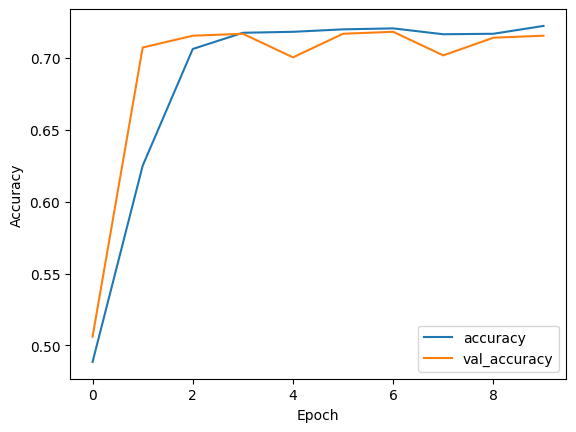

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [13]:
batch = next(test_generator)
print(batch.shape)  # Should output the expected batch shape


(32, 224, 224, 3)


In [14]:
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)


46/46 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step


In [15]:
print(predictions)

[[0.06922533 0.28041312 0.4177855  0.09281728 0.1397587 ]
 [0.06612239 0.27608868 0.41218987 0.10032246 0.14527656]
 [0.06345519 0.27881128 0.4172129  0.09725887 0.14326172]
 ...
 [0.69381964 0.02774293 0.18854819 0.03650824 0.05338101]
 [0.10466574 0.2275425  0.42737523 0.09914421 0.14127238]
 [0.02102084 0.27012846 0.4950848  0.07621192 0.13755397]]


In [16]:
import numpy as np

# Get the index of the maximum probability for each image
predicted_classes = np.argmax(predictions, axis=1)

# Define the class names
class_names = ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']

# Map the indices to class labels
predicted_labels = [class_names[idx] for idx in predicted_classes]

# Print each predicted label on a new line
for label in predicted_labels:
    print(label)


Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Healthy
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Healthy
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Healthy
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Healthy
Healthy
Moderate DR
Moderate DR
Healthy
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Healthy
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Healthy
Moderate DR
Moderate DR
Moderate DR
Healthy
Healthy
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Healthy
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Healthy
Healthy
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate DR
Moderate

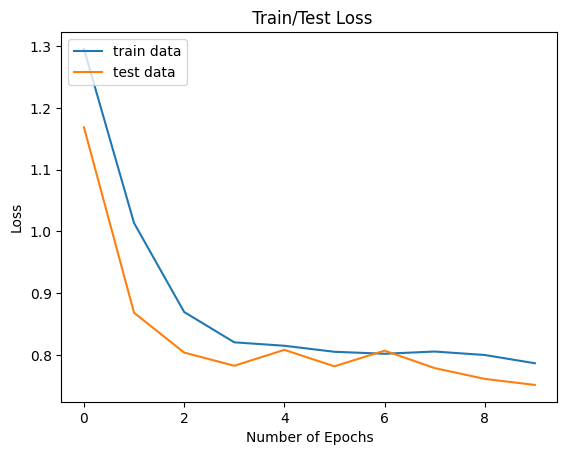

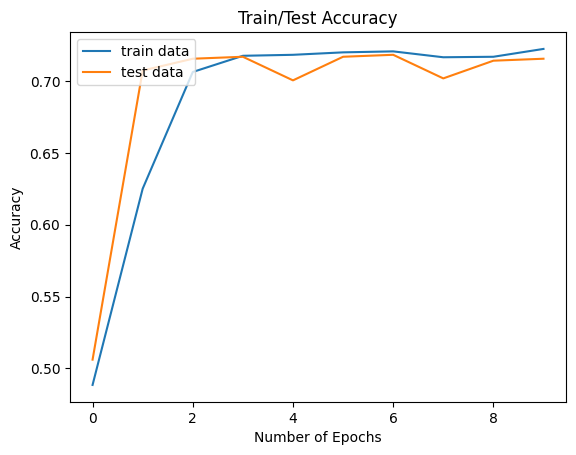

In [17]:
# Plot history: Loss
plt.plot(history.history['loss'], label='train data')
plt.plot(history.history['val_loss'], label='test data')
plt.title(' Train/Test Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(loc="upper left")
plt.show()

# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='train data')
plt.plot(history.history['val_accuracy'], label='test data')
plt.title('Train/Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(loc="upper left")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The model predicts the image is: Healthy with probability 0.8357667922973633


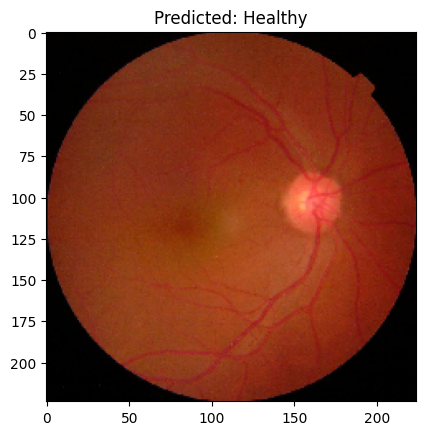

In [42]:
# prediction

# Load and preprocess the image
img_path = r'C:\Users\Manas\Videos\datasets\New folder\train classes\0\1caba2fb38f6.png'  # Provide the path to your image

# Load the image with target size matching your model's input size (e.g., 224x224 for ResNet)
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array and expand dimensions (to match batch size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension for batch size

# Normalize the image (if your model was trained with normalization)
img_array /= 255.0  # Assuming the model was trained with normalized data in the range [0, 1]

# Predict the class probabilities
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class_idx = np.argmax(predictions, axis=1)

# Define your class labels (modify according to your class names)
class_names = ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']
predicted_class_label = class_names[predicted_class_idx[0]]

# Print the prediction
print(f"The model predicts the image is: {predicted_class_label} with probability {predictions[0][predicted_class_idx[0]]}")

# Optionally, display the image for visual confirmation
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_label}")
plt.show()


In [18]:
batch = next(test_generator)
print(batch.shape)  # Should output the expected batch shape


(32, 224, 224, 3)


In [19]:
model.save("Diabetic.h5")